### Fashion MNIST
- **Fashion MNIST dataset**: Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.
- **Goal**: classify grayscale Fashion-MNIST images into 10 classes
- **[Keras MNIST](https://keras.io/examples/vision/mnist_convnet/)**

In [3]:
# https://www.tensorflow.org/guide/keras/overview
import tensorflow as tf 
from tensorflow import keras 
print(f"Tensorflow: {tf.__version__} \nKeras: {keras.__version__}")
from tensorflow.keras import layers

Tensorflow: 2.18.0 
Keras: 3.8.0


In [5]:
(X_train,y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()

In [6]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X_train.shape, y_train.shape  

((60000, 28, 28), (60000,))

In [8]:
X_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [9]:
y_train[0]

9

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]
class_nums = len(class_names)

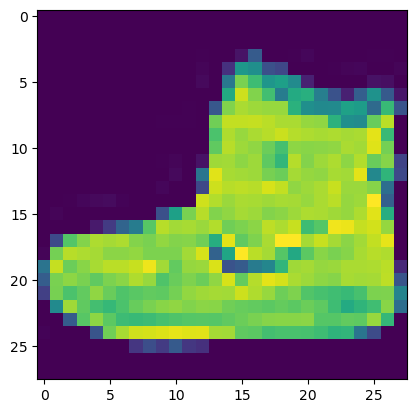

In [11]:
import matplotlib.pyplot as plt 
import numpy as np
import random
plt.imshow(X_train[0]);

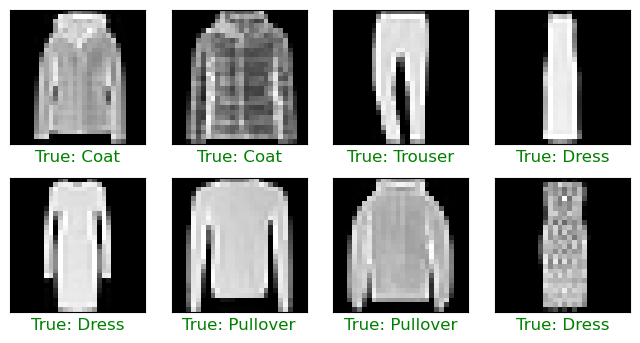

In [ ]:
def plot_data1(X_data : np.ndarray,y_data : np.ndarray) -> None:
    nrows,ncols = 2,4
    fig,axes = plt.subplots(nrows= nrows ,ncols = ncols ,figsize= (8,4))
    len_idx = X_data.shape[0]
    for idx in range(nrows * ncols):
        ax = axes[idx // ncols,idx % ncols]
        img_idx = random.randint(0,len_idx)
        ax.imshow(X_data[img_idx],cmap = 'gray')
        ax.set(xticks = [],yticks = [])
        true_label_str = f'True: {class_names[y_data[img_idx]]}'
        ax.set_xlabel(true_label_str, color = 'green',fontsize = 12)
plot_data1(X_train,y_train)

### Image Pre-processing
- Reshaping it into the shape the model expects and scaling it so that all values are in the `[0, 1]` interval
- Transform from `unit8` it into a `float32`
- Normalization : https://github.com/CodexploreRepo/deep-learning/blob/main/docs/topics/training_skeleton.md#input-data-normalization

In [14]:
# Convert to float32 & Scale images to the [0, 1] range for training
X_train = X_train.astype(np.float32) /255
X_test = X_test.astype(np.float32)/255 

In [15]:
X_test.shape, X_test.dtype

((10000, 28, 28), dtype('float32'))

In [ ]:
# Make sure images have shape (60000, 28, 28) => (60000, 28, 28, 1)
X_train= np.expand_dims(X_train,axis = -1)
X_test= np.expand_dims(X_test,axis = -1)


In [ ]:
y_train_label= keras.utils.to_categorical(y_train,class_nums) # one hot voi do dai = 10
y_test_label = keras.utils.to_categorical(y_test,class_nums)
y_train_label[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
input_shape= (28, 28,1)
model = keras.models.Sequential([layers.Flatten(input_shape = input_shape),# (28*28,1) -> (28*28= 784)
                                layers.Dense(512, activation = 'relu'),
                                layers.Dense(256, activation = 'relu'),
                                layers.Dense(class_nums,activation = 'softmax')]) 
model.summary()

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
# optimizer when model train optimizer use back propagation to update parameter in ANN

In [ ]:
epochs = 10 
batch_size =128
history = model.fit(X_train, y_train_label, epochs=epochs,batch_size=batch_size, # defaults to 32
                    validation_split=0.1,  # use the last 10% of the data (before shuffling) for validation
                    )


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7257 - loss: 0.7582 - val_accuracy: 0.8472 - val_loss: 0.4147
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8536 - loss: 0.3952 - val_accuracy: 0.8668 - val_loss: 0.3615
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8725 - loss: 0.3376 - val_accuracy: 0.8567 - val_loss: 0.4048
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8844 - loss: 0.3121 - val_accuracy: 0.8782 - val_loss: 0.3353
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8950 - loss: 0.2842 - val_accuracy: 0.8803 - val_loss: 0.3250
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8989 - loss: 0.2684 - val_accuracy: 0.8895 - val_loss: 0.3127
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9028 - loss: 0.2592 - val_accuracy: 0.8810 - val_loss: 0.3419
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9082 - loss: 0.2420 - val_accuracy: 0.

'trong 1 epochs(so lan lap qua du lieu) co nhieu batch moi batch co 128 vi du tinh toan loss 128 vd, update tung cai weight trong ANN\nlay batch khac 128 vdu khac va lap lai khi het 60000. Lap lai epochs moi va chon ra tung cai batch voi do dai\n128 de update cac weight'

In [35]:
history_dict = history.history

In [36]:
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [37]:
train_loss,val_loss = history_dict['loss'], history_dict['val_loss']
train_acc,val_acc = history_dict['accuracy'], history_dict['val_accuracy']

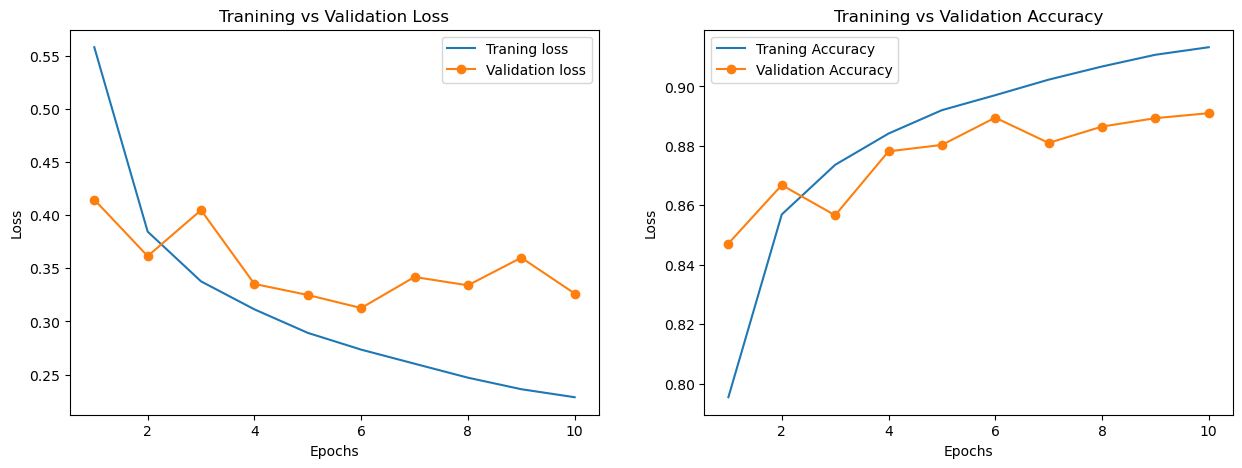

In [38]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize= (15,5))
epoch_runs = [i+ 1  for i in range(epochs)]
ax1.plot(epoch_runs,train_loss,label = 'Traning loss')
ax1.plot(epoch_runs,val_loss,label = 'Validation loss',marker = 'o')
ax1.set(title = 'Tranining vs Validation Loss',xlabel = 'Epochs', ylabel = 'Loss')
ax1.legend()

ax2.plot(epoch_runs,train_acc,label = 'Traning Accuracy')
ax2.plot(epoch_runs,val_acc,label = 'Validation Accuracy',marker = 'o')
ax2.set(title = 'Tranining vs Validation Accuracy',xlabel = 'Epochs', ylabel = 'Loss')
ax2.legend()

##  Model Evaluation

In [40]:
score = model.evaluate(X_test,y_test_label)
#[loss,accuracy]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8878 - loss: 0.3450  


In [41]:
print(f"Test loss:{score[0]:.4f}")
print(f"Test accuracy:{score[1]:.4f}")

Test loss:0.3408
Test accuracy:0.8865


### Prediction

In [43]:
X_sample = X_test[:3]
y_proba= model.predict(X_sample) # Probability cua tung item trong sample


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [44]:
y_proba.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   ,
        0.998],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [45]:
predictions = np.argmax(y_proba ,axis = 1)# lay idx of max probability of each predict
predictions

array([9, 2, 1], dtype=int64)

In [46]:
[class_names[pred] for pred in predictions]

['Ankle boot', 'Pullover', 'Trouser']

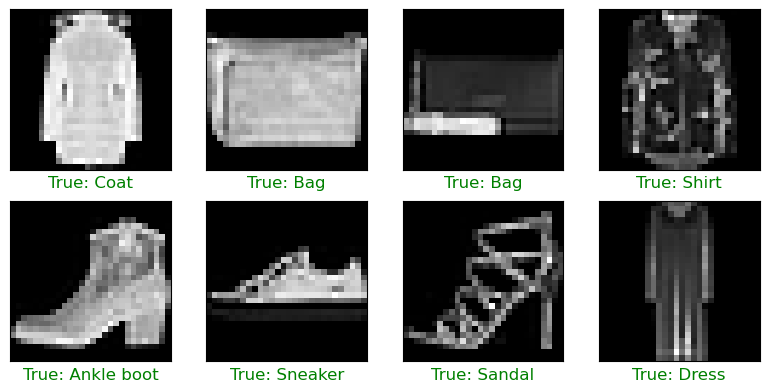

In [47]:
from typing import Optional # co cx dc k co cx k sao
def plot_data_with_prediction(X_data : np.ndarray,y_data : np.ndarray, y_proba : Optional[np.ndarray] = None) -> None:
    nrows,ncols = 2,4 
    fig,axes = plt.subplots(nrows = nrows, ncols= ncols, figsize = (8,4))
    len_idx = X_data.shape[0]
    for idx in range(nrows * ncols): 
        ax = axes[idx // ncols ,idx % ncols]
        idx_img = random.randint(0,len_idx)
        ax.imshow(X_data[idx_img],cmap = 'gray')
        ax.set(xticks = [],yticks = [])
        color = 'green'
        true_label_str = f'True: {class_names[y_data[idx_img]]}'# label ten cua cac vat pham
        
        if y_proba is not None:
            predicted_idx= np.argmax(y_proba[idx_img])
            predicted_label = class_names[predicted_idx]
            color = 'red' if predicted_idx != y_data[idx_img]  else color # y_data[idx_img] return 1 to 10
            predicted_label_str = f"\nPredicted {predicted_label}"
        img_title = true_label_str if y_proba is None else true_label_str + predicted_label_str
           
        ax.set_xlabel(img_title, color = color,fontsize = 12)
    plt.tight_layout()
    plt.show()
plot_data_with_prediction(X_test,y_test)

In [48]:
y_proba1 = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step


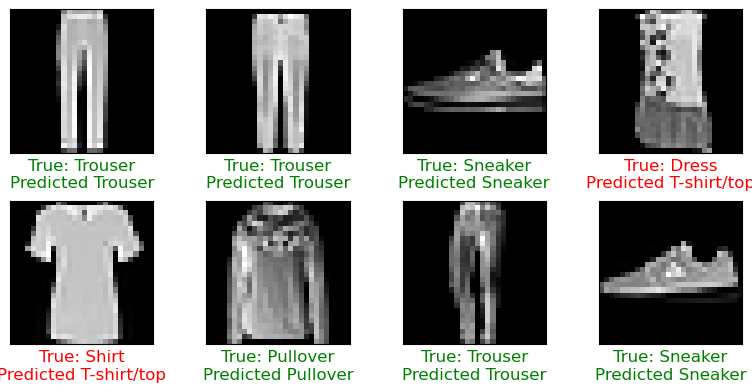

In [49]:
plot_data_with_prediction(X_test,y_test,y_proba1)